## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

In [1]:
# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Import Seaborn.
import seaborn as sns

In [155]:
df_final = pd.read_csv("../a_data/final.csv")
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,50.0,39.120,35.216323,2.0,4.000,34.00,65.000,100.0
sat_2017_read_write,50.0,570.400,44.870335,503.0,532.750,559.50,613.500,644.0
sat_2017_math,50.0,558.160,46.359007,492.0,523.250,549.50,601.000,651.0
sat_2017_total,50.0,1128.660,90.922171,996.0,1055.250,1107.50,1214.000,1295.0
act_2017_participation,50.0,65.520,32.711628,8.0,31.000,71.00,100.000,100.0
act_2017_english,50.0,20.880,2.346948,16.3,19.000,20.55,23.100,25.5
act_2017_math,50.0,21.154,1.996242,18.0,19.400,20.90,23.000,25.3
act_2017_reading,50.0,21.968,2.061448,18.1,20.425,21.70,23.875,26.0
act_2017_science,50.0,21.420,1.743911,18.2,19.925,21.30,22.975,24.9
act_2017_composite,50.0,21.000,2.070197,17.0,19.000,21.00,22.750,25.0


In [156]:
df_final.head()

,state,sat_2017_participation,sat_2017_read_write,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_read_write,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.0,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.0,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.0,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.0,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.0,60.0,540,536,1076,27.0,22.7


#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

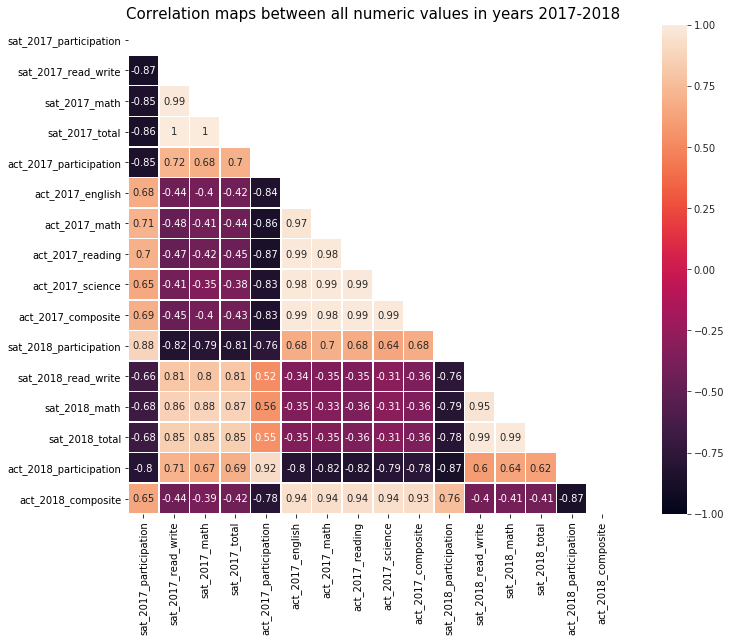

In [3]:
#Inspired by 2.02 GA class session

# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = df_final.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.title("Correlation maps between all numeric values in years 2017-2018", fontsize = 15)
# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)
    
plt.savefig("../c_plots/heat_map_all_columns.png")

In [4]:
df_parted = df_final[["sat_2017_participation", "sat_2018_participation", "act_2017_participation", "act_2018_participation"]]


new_columns_dict = {
    'sat_2017_participation': 'sat_17',
    'sat_2018_participation': 'sat_18',
    'act_2017_participation': 'act_17',
    'act_2018_participation': 'act_18',
}

df_parted.rename(columns=new_columns_dict, inplace=True)

/Users/smighani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


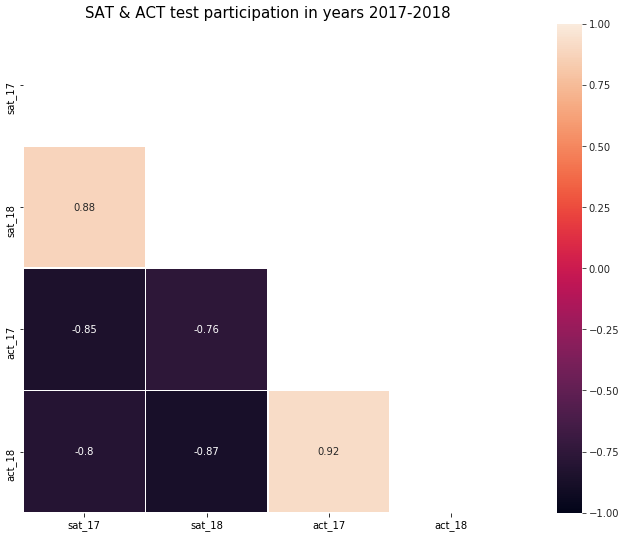

In [5]:
#Inspired by 2.02 GA class session

# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = df_parted.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.title("SAT & ACT test participation in years 2017-2018", fontsize = 15)
# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)
    
plt.savefig("../c_plots/heat_map_participation.png")

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

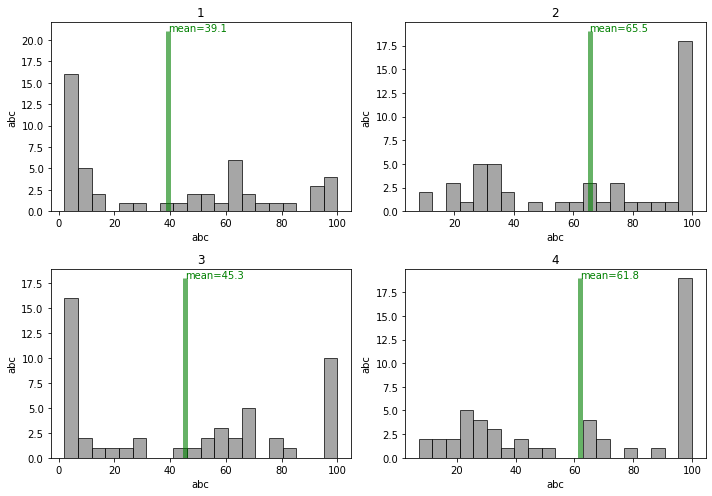

In [84]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    
    plt.rcParams["patch.force_edgecolor"] = True # Inspiration: https://stackoverflow.com/questions/43080259/no-outlines-on-bins-of-matplotlib-histograms-or-seaborn-distplots
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10, 7)); # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 20, color = "grey", alpha = 0.7); # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].vlines(x = np.mean(dataframe[column]), ymin = 0, ymax = np.max((np.histogram(dataframe[column]))[0]), color = 'green', linewidth = 5, alpha = 0.6)
        ax[i].text(np.mean(dataframe[column]), np.max((np.histogram(dataframe[column]))[0]), f'mean={round(np.mean(dataframe[column]), 1)}', color = 'green')
        ax[i].set_title(list_of_titles[i]);
        ax[i].set_xlabel(list_of_xlabels[i]);
        ax[i].set_ylabel(list_of_ylabels[i]);
        plt.tight_layout();

#Testing the function        
subplot_histograms(df_final, ["sat_2017_participation", "act_2017_participation", "sat_2018_participation", "act_2018_participation"], ["1", "2", "3", "4"], ["abc", "abc", "abc", "abc"], ["abc", "abc", "abc", "abc"]);


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

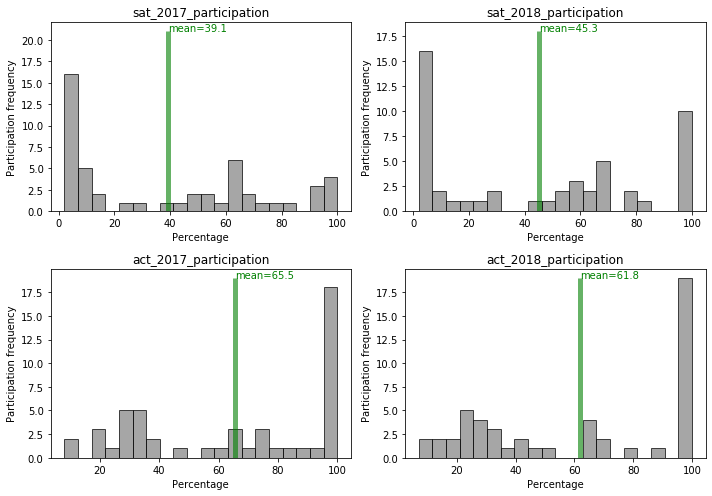

In [85]:
# Code
dataframe = df_final
list_of_columns = ["sat_2017_participation", "sat_2018_participation", "act_2017_participation", "act_2018_participation"]
list_of_titles = list_of_columns
list_of_xlabels = ["Percentage"] * 4
list_of_ylabels = ["Participation frequency"] * 4
subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels);

plt.savefig("../c_plots/hist_partic_sat_act.png")

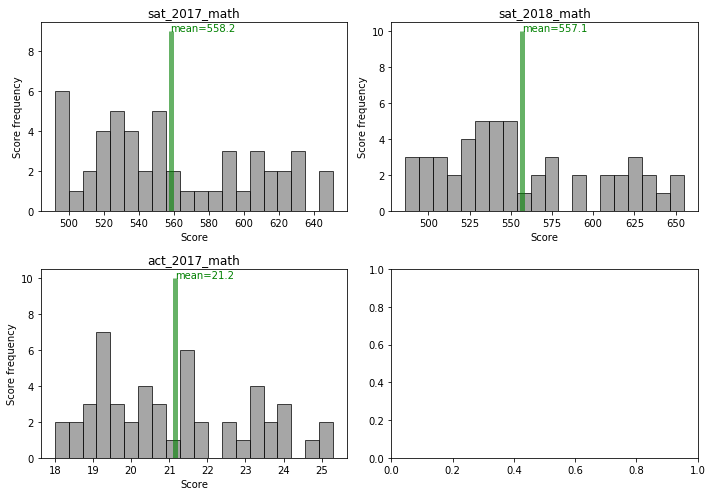

In [87]:
# Code
dataframe = df_final
list_of_columns = ["sat_2017_math", "sat_2018_math", "act_2017_math"]
list_of_titles = list_of_columns
list_of_xlabels = ["Score"] * 3
list_of_ylabels = ["Score frequency"] * 3
subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels);

plt.savefig("../c_plots/hist_sat_act_math.png")

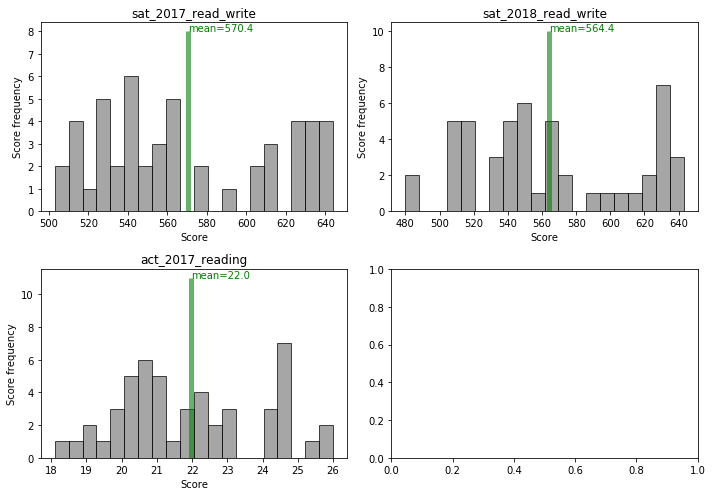

In [88]:
# Code
dataframe = df_final
list_of_columns = ["sat_2017_read_write", "sat_2018_read_write", "act_2017_reading"]
list_of_titles = list_of_columns
list_of_xlabels = ["Score"] * 3
list_of_ylabels = ["Score frequency"] * 3
subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels);

plt.savefig("../c_plots/hist_sat_act_read_write.png")

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


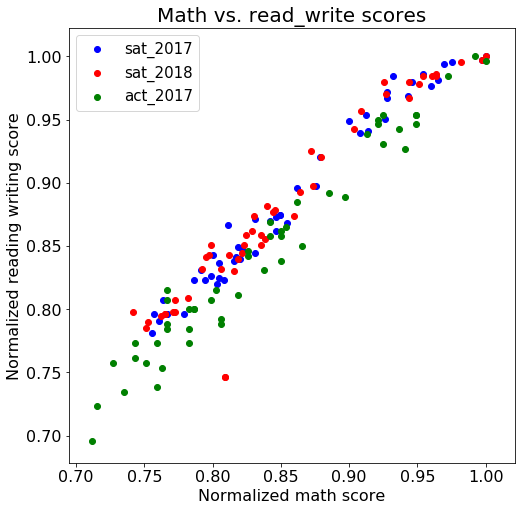

In [90]:
# Code

plt.figure(figsize = (8, 8))

# Create scatterplot of high prices versus volume.
plt.scatter(df_final["sat_2017_math"]/np.max(df_final["sat_2017_math"]), df_final["sat_2017_read_write"]/np.max(df_final["sat_2017_read_write"]), color = "blue")
plt.scatter(df_final["sat_2018_math"]/np.max(df_final["sat_2018_math"]), df_final["sat_2018_read_write"]/np.max(df_final["sat_2018_read_write"]), color = "red")
plt.scatter(df_final["act_2017_math"]/np.max(df_final["act_2017_math"]), df_final["act_2017_reading"]/np.max(df_final["act_2017_reading"]), color = "green")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("Math vs. read_write scores", fontsize = 20)
plt.xlabel("Normalized math score", fontsize = 16)
plt.ylabel("Normalized reading writing score", fontsize = 16);
plt.legend(["sat_2017", "sat_2018", "act_2017"], fontsize = 15)

plt.savefig("../c_plots/scatter_read_write_math.png")

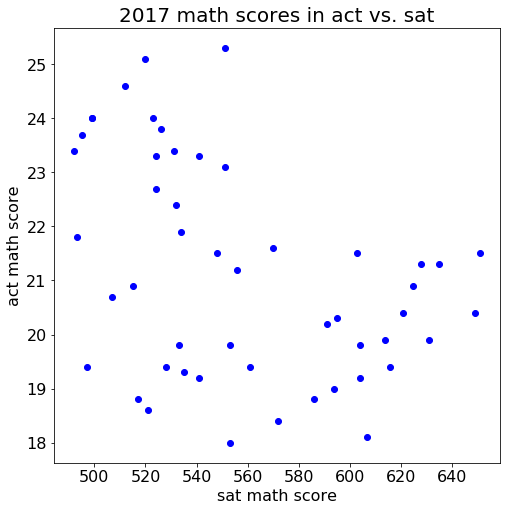

In [92]:
plt.figure(figsize = (8, 8))

# Create scatterplot of high prices versus volume.
plt.scatter(df_final["sat_2017_math"], df_final["act_2017_math"], color = "blue")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("2017 math scores in act vs. sat", fontsize = 20)
plt.xlabel("sat math score", fontsize = 16)
plt.ylabel("act math score", fontsize = 16);

plt.savefig("../c_plots/scatter_sat_vs_act_2017_math.png")

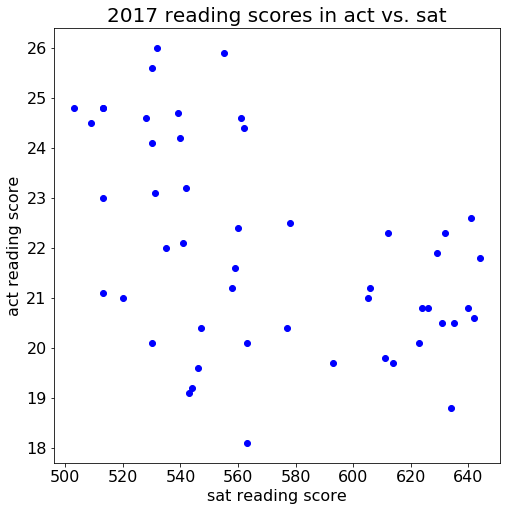

In [94]:
plt.figure(figsize = (8, 8))

# Create scatterplot of high prices versus volume.
plt.scatter(df_final["sat_2017_read_write"], df_final["act_2017_reading"], color = "blue")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("2017 reading scores in act vs. sat", fontsize = 20)
plt.xlabel("sat reading score", fontsize = 16)
plt.ylabel("act reading score", fontsize = 16);

plt.savefig("../c_plots/scatter_sat_vs_act_2017_reading.png")

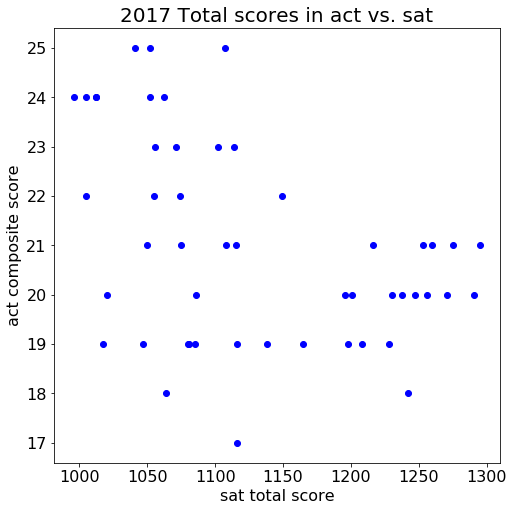

In [96]:
plt.figure(figsize = (8, 8))

# Create scatterplot of high prices versus volume.
plt.scatter(df_final["sat_2017_total"], df_final["act_2017_composite"], color = "blue")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("2017 Total scores in act vs. sat", fontsize = 20)
plt.xlabel("sat total score", fontsize = 16)
plt.ylabel("act composite score", fontsize = 16);

plt.savefig("../c_plots/scatter_sat_vs_act_2017_total.png")

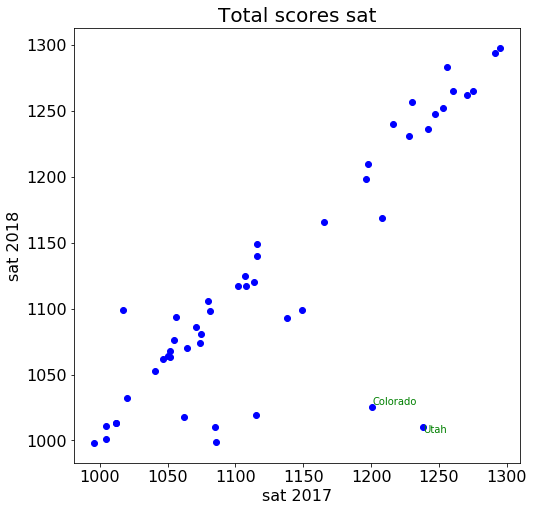

In [251]:
plt.figure(figsize = (8, 8))

# Create scatterplot of high prices versus volume.
plt.scatter(df_final["sat_2017_total"], df_final["sat_2018_total"], color = "blue")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("Total scores sat", fontsize = 20)
plt.xlabel("sat 2017", fontsize = 16)
plt.ylabel("sat 2018", fontsize = 16);

plt.text((df_final["sat_2017_total"][5]) , (df_final["sat_2018_total"][5]+2) , "Colorado", color = 'green')
plt.text((df_final["sat_2017_total"][43]) , (df_final["sat_2018_total"][43]-4) , "Utah", color = 'green')


plt.savefig("../c_plots/scatter_sat_2017_vs_2018_total.png")

In [249]:
df_outliers = df_final.loc[((df_final["sat_2017_total"] > 1150) & (df_final["sat_2018_total"] < 1050)), :]
df_outliers.head()


,state,sat_2017_participation,sat_2017_read_write,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_read_write,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.0,100.0,519,506,1025,30.0,23.9
43,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.0,4.0,480,530,1010,100.0,20.4


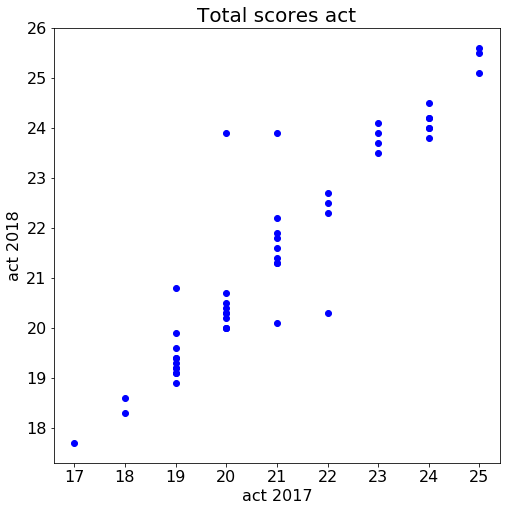

In [100]:
plt.figure(figsize = (8, 8))

# Create scatterplot of high prices versus volume.
plt.scatter(df_final["act_2017_composite"], df_final["act_2018_composite"], color = "blue")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("Total scores act", fontsize = 20)
plt.xlabel("act 2017", fontsize = 16)
plt.ylabel("act 2018", fontsize = 16);

plt.savefig("../c_plots/scatter_act_2017_vs_2018_composite.png")

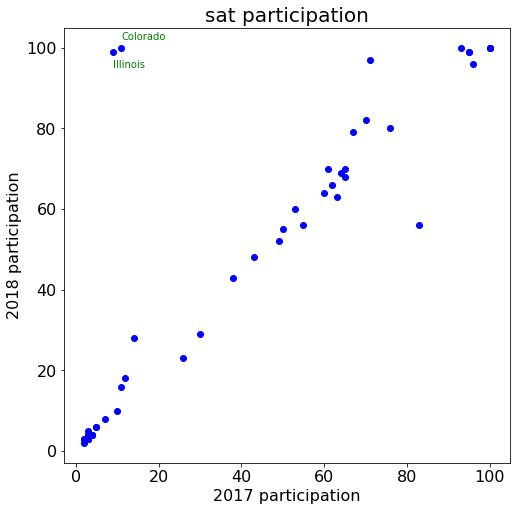

In [148]:
plt.figure(figsize = (8, 8))

# Create scatterplot of high prices versus volume.
plt.scatter(df_final["sat_2017_participation"], df_final["sat_2018_participation"], color = "blue")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("sat participation", fontsize = 20)
plt.xlabel("2017 participation", fontsize = 16)
plt.ylabel("2018 participation", fontsize = 16);

df_outliers = df_final.loc[((df_final["sat_2017_participation"] < 20) & (df_final["sat_2018_participation"] > 80)), :]


#outliers: #Colorado and Illinois

plt.text((df_final["sat_2017_participation"][5]) , (df_final["sat_2018_participation"][5]+2) , "Colorado", color = 'green')
plt.text((df_final["sat_2017_participation"][12]) , (df_final["sat_2018_participation"][12]-4) , "Illinois", color = 'green')






plt.savefig("../c_plots/scatter_sat_2017_vs_2018_participation.png")

In [141]:
df_outliers = df_final.loc[((df_final["sat_2017_participation"] < 20) & (df_final["sat_2018_participation"] > 80)),:]
df_outliers



,state,sat_2017_participation,sat_2017_read_write,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_read_write,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.0,100.0,519,506,1025,30.0,23.9
12,Illinois,9.0,559,556,1115,93.0,21.0,21.2,21.6,21.3,21.0,99.0,513,506,1019,43.0,23.9


In [143]:
(df_final["sat_2017_participation"][5]) #Colorado
(df_final["sat_2017_participation"][12]) #Illinois



9.0

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

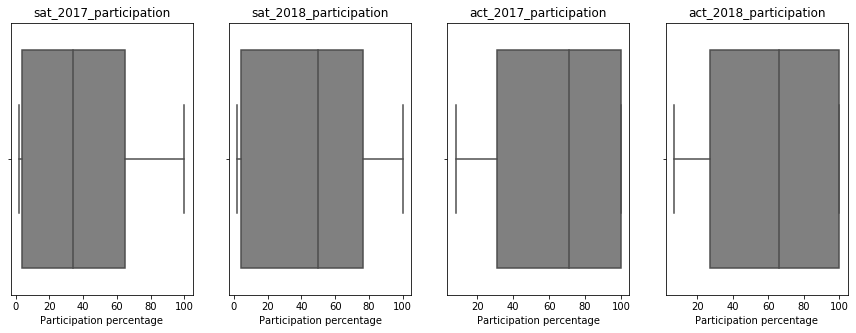

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [244]:
def subplot_boxplot(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    plt.rcParams["patch.force_edgecolor"] = True # Inspiration: https://stackoverflow.com/questions/43080259/no-outlines-on-bins-of-matplotlib-histograms-or-seaborn-distplots
    ncolumns = len(list_of_columns)
    fig, ax = plt.subplots(nrows=1, ncols=ncolumns, figsize = (15, 5)); # You'll want to specify your figsize
    #ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate

    for i in range(len(list_of_columns)): # Gives us an index value to get into all our lists
        plt.figure(figsize=(20,5))
        sns.boxplot(dataframe[list_of_columns[i]], orient='h', ax=ax[i], color = "grey");
        ax[i].set_title(list_of_titles[i]);
        ax[i].set_xlabel(list_of_xlabels[i]);
        plt.tight_layout();
        plt.tight_layout();
        
        

dataframe = df_final
list_of_columns = ["sat_2017_participation", "sat_2018_participation", "act_2017_participation", "act_2018_participation"]
list_of_titles = list_of_columns
list_of_xlabels = ["Participation percentage"]*len(list_of_columns)
subplot_boxplot(dataframe, list_of_columns, list_of_titles, list_of_xlabels)

plt.savefig("../c_plots/boxcar_participation.png")

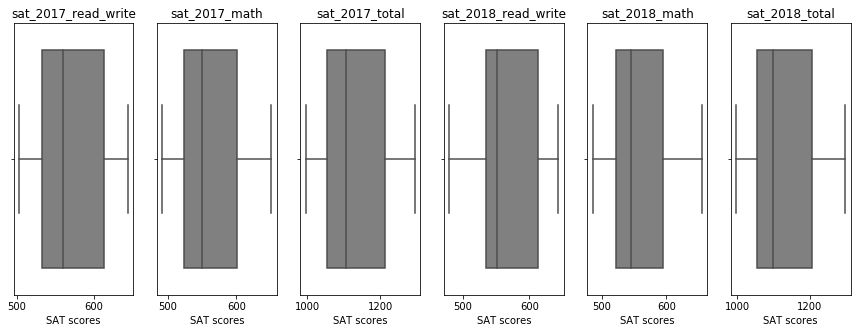

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [246]:
def subplot_boxplot(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    plt.rcParams["patch.force_edgecolor"] = True # Inspiration: https://stackoverflow.com/questions/43080259/no-outlines-on-bins-of-matplotlib-histograms-or-seaborn-distplots
    ncolumns = len(list_of_columns)
    fig, ax = plt.subplots(nrows=1, ncols=ncolumns, figsize = (15, 5)); # You'll want to specify your figsize
    #ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate

    for i in range(len(list_of_columns)): # Gives us an index value to get into all our lists
        plt.figure(figsize=(20,5))
        sns.boxplot(dataframe[list_of_columns[i]], orient='h', ax=ax[i], color = "grey");
        ax[i].set_title(list_of_titles[i]);
        ax[i].set_xlabel(list_of_xlabels[i]);
        plt.tight_layout();
        plt.tight_layout();
        
        

dataframe = df_final
list_of_columns = ["sat_2017_read_write", "sat_2017_math", "sat_2017_total", "sat_2018_read_write", "sat_2018_math", "sat_2018_total"]
list_of_titles = list_of_columns
list_of_xlabels = ["SAT scores"]*len(list_of_columns)
subplot_boxplot(dataframe, list_of_columns, list_of_titles, list_of_xlabels)

plt.savefig("../c_plots/boxcar_sat_scores.png")

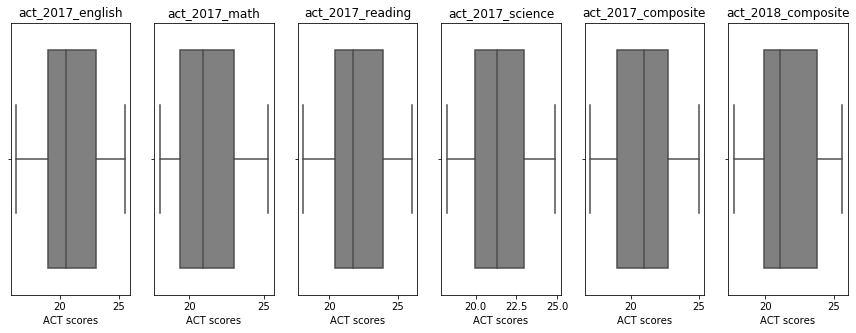

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [247]:
def subplot_boxplot(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    plt.rcParams["patch.force_edgecolor"] = True # Inspiration: https://stackoverflow.com/questions/43080259/no-outlines-on-bins-of-matplotlib-histograms-or-seaborn-distplots
    ncolumns = len(list_of_columns)
    fig, ax = plt.subplots(nrows=1, ncols=ncolumns, figsize = (15, 5)); # You'll want to specify your figsize
    #ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate

    for i in range(len(list_of_columns)): # Gives us an index value to get into all our lists
        plt.figure(figsize=(20,5))
        sns.boxplot(dataframe[list_of_columns[i]], orient='h', ax=ax[i], color = "grey");
        ax[i].set_title(list_of_titles[i]);
        ax[i].set_xlabel(list_of_xlabels[i]);
        plt.tight_layout();
        plt.tight_layout();
        
        

dataframe = df_final
list_of_columns = ["act_2017_english", "act_2017_math", "act_2017_reading", "act_2017_science", "act_2017_composite", "act_2018_composite"]
list_of_titles = list_of_columns
list_of_xlabels = ["ACT scores"]*len(list_of_columns)
subplot_boxplot(dataframe, list_of_columns, list_of_titles, list_of_xlabels)

plt.savefig("../c_plots/boxcar_act_scores.png")

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Colorado, Illinois, and Utah

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

For states where sat rates were high, the act rates were low.
Based on discussion in class, the state new laws influecned sat participation rates.

## Bonus: Descriptive and Inferential Statistics

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

In [257]:
sat_17_rate_skew = (df_final["sat_2017_participation"].skew())
sat_17_math_skew = (df_final["sat_2017_math"].skew())
sat_17_read_skew = (df_final["sat_2017_read_write"].skew())

print(f"sat_17_rate_skewness: {round(sat_17_rate_skew, 2)}, sat_17_math_skewness: {round(sat_17_math_skew, 2)}, sat_17_read_skewness: {round(sat_17_read_skew, 2)}")
print("The three parameters are normal")

sat_17_rate_skewness: 0.38, sat_17_math_skewness: 0.42, sat_17_read_skewness: 0.33
The three parameters are normal
